<a href="https://colab.research.google.com/github/SHINIGAMILIGHT/Projects/blob/main/Heart_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import requests
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hrt =pd.read_csv("drive/My Drive/Colab/heart.csv")
o2 =pd.read_csv("drive/My Drive/Colab/o2Saturation.csv")

In [ ]:
hrt

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
o2

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


About this dataset

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina

Value 2: atypical angina

Value 3: non-anginal pain

Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

n

In [ ]:
hrt.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
px.imshow(hrt.corr())

In [ ]:
cor = hrt.corr()[["output"]].sort_values(by = "output", ascending = False)[1:]

In [ ]:
cor[abs(cor["output"]) > 0.4]

,output
cp,0.433798
thalachh,0.421741
oldpeak,-0.430696
exng,-0.436757


In [ ]:
px.histogram(hrt.output, color = 'value', color_discrete_sequence=px.colors.qualitative.Pastel1)

Patients at high risk = 165

Patients at low risk = 138

In [ ]:
hrt_sex = hrt.sex

In [ ]:
hrt.corr().sex

age        -0.098447
sex         1.000000
cp         -0.049353
trtbps     -0.056769
chol       -0.197912
fbs         0.045032
restecg    -0.058196
thalachh   -0.044020
exng        0.141664
oldpeak     0.096093
slp        -0.030711
caa         0.118261
thall       0.210041
output     -0.280937
Name: sex, dtype: float64

In [ ]:
px.histogram(hrt.sex, color = hrt.output, color_discrete_sequence=px.colors.qualitative.Pastel2)

In [ ]:
px.histogram(hrt.cp, color = hrt.output, color_discrete_sequence=px.colors.qualitative.Antique)

Greater Chest Pain - Greater The Chance Of Heart Attack

In [ ]:
px.box(hrt.age, color = 'variable', color_discrete_sequence=px.colors.qualitative.Pastel)

CHECKING FOR SKEWNESS AND KURTOSIS

In [ ]:
make_subplots(rows=1, cols=2)(px.histogram(hrt['age']), px.histogram(hrt['trtbps']))

TypeError: ignored

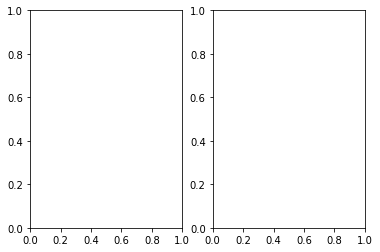

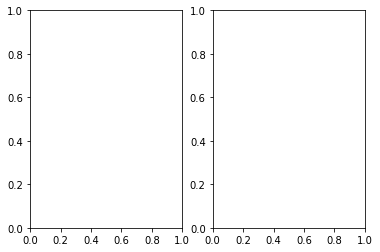

In [ ]:
plt.figure
hist("age",1)
hist("trtbps",2)
plt.show()

plt.figure
hist("chol",1)
hist("thalachh",2)
plt.show()